In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os

## 서브미션 합쳐서 DF만들기

### submissions라는 파일 명 안에 합칠 submission들 다 넣어놓으면 됨
### submission 바꾸면서 하려면 다른 이름의 파일에 저장해서 아래 코드 folder 변수 다른 이름의 파일로 바꿔주면 됨

In [27]:
folder = 'e_submission'
nf = 0
for f in os.listdir(folder):
    ext = os.path.splitext(f)[-1]
    if ext == '.csv': 
        s = pd.read_csv(folder+"/"+f)
    else: 
        continue
    if len(s.columns) !=2:
        continue
    if nf == 0: 
        slist = s
    else: 
        slist = pd.merge(slist, s, on="ID")
    nf += 1

In [28]:
sub_m = slist.set_index('ID')

In [29]:
num = []
for i in range(len(sub_m.columns)):
    num.append(i+1)

In [30]:
sub_m.columns = num

In [31]:
sub_m

,1,2,3,4
ID,,,,
0,0.953988,0.983973,0.999018,0.984000
1,0.067155,0.471476,0.956781,0.422000
2,0.717147,0.651708,0.925372,0.477333
3,0.987646,0.990566,0.092518,0.994000
4,0.015192,0.057661,0.928378,0.098000
...,...,...,...,...
1355512,0.238585,0.007381,0.047760,0.242000
1355513,0.017512,0.071779,0.001680,0.084000
1355514,0.024213,0.071642,0.028297,0.094000


## 서브미션 별 corr확인

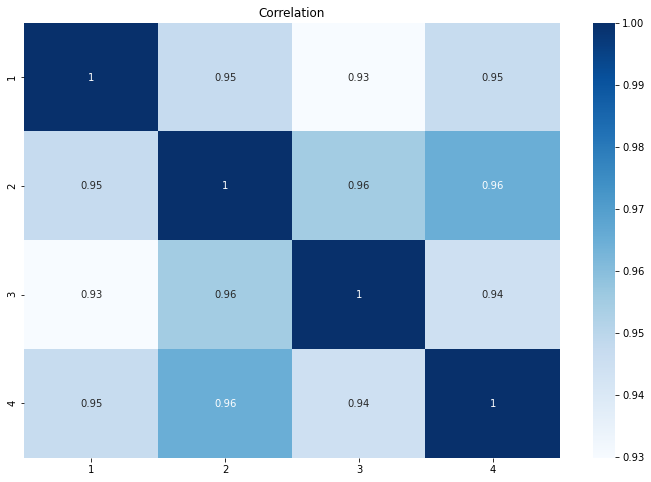

In [32]:
plt.figure(figsize = (12,8))
g = sns.heatmap(sub_m.corr(), annot = True, cmap = 'Blues')
g.set_title('Correlation')
plt.show()

## submission averaging -> 새로운 submission 생성
## (p =1 -> 산술평균 p>1 멱평균)

In [35]:
p = 1    # 이 값에 따라 성능이 달라짐 (p=1: 산술평균, p>1: 멱평균)
if nf >= 2:
    pred = 0
    for j in range(nf): pred = pred + sub_m.iloc[:,j]**p 
    pred = pred / nf    
    pred = pred**(1/p)

    submission = pd.DataFrame({'ID': sub_m.index, 'STATUS': pred})
    submission.to_csv(os.path.abspath("../submission") + "/ensemble.csv", index=False)

## 가중

In [11]:
#pred = sub_m.iloc[:,0]*0.1+sub_m.iloc[:,1]*0.2+sub_m.iloc[:,0]*0.2+sub_m.iloc[:,1]*0.2+sub_m.iloc[:,0]*0.3
    
#submission = pd.DataFrame({'ID': sub_m.index, 'STATUS': pred})
#t = pd.Timestamp.now()
#submission.to_csv(os.path.abspath("../submission") + "/gensemble.csv", index=False)